**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


**Load** **data**

In [ ]:
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Shape of data**

In [ ]:
df.shape


(614, 13)

**Description of dataset**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/tmp/ipython-input-11-1701606558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-11-1701606558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# **Exploratory Data Analysis (EDA)**

**Target Variable Distribution**

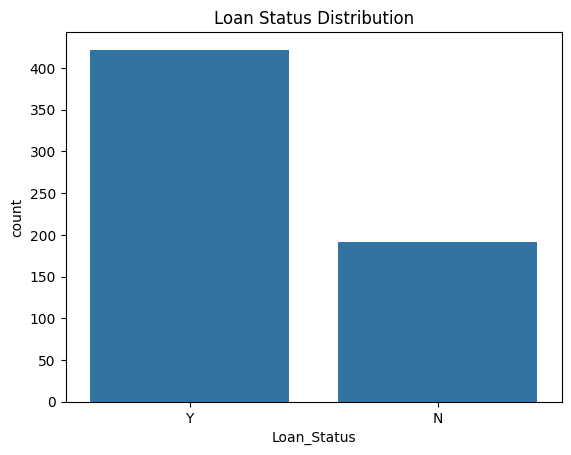

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

print(df['Loan_Status'].value_counts(normalize=True))

**Distribution Plots**

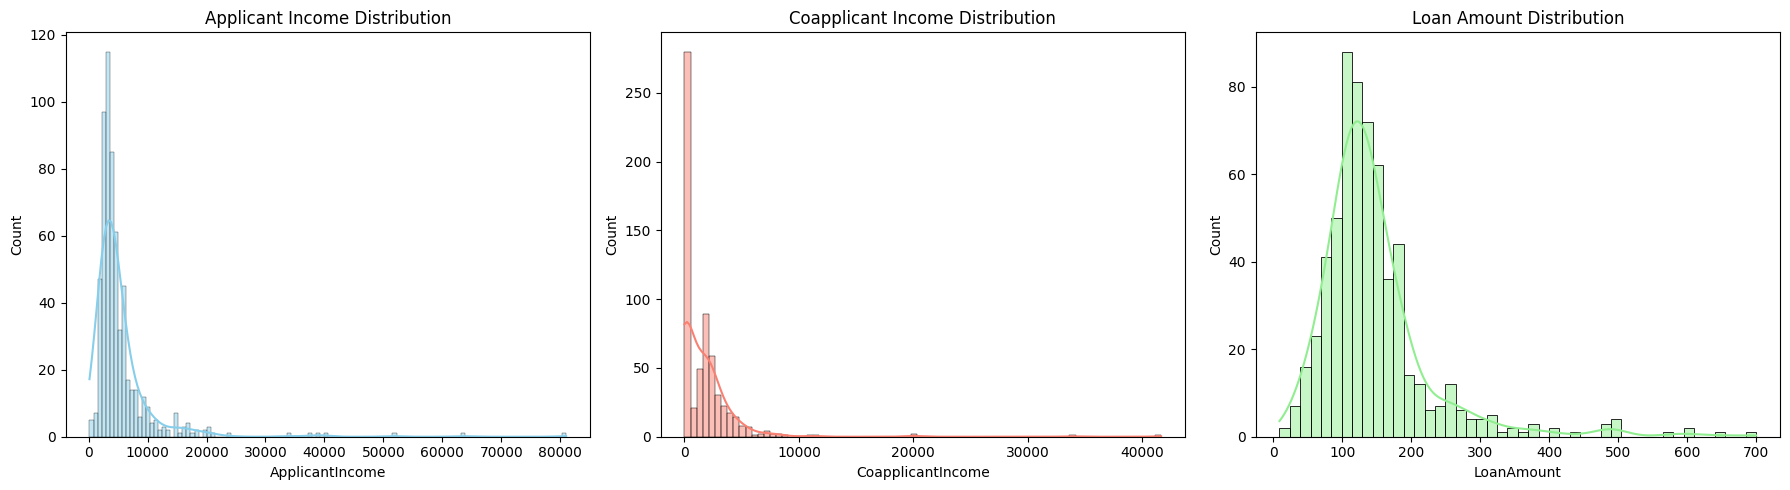

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['ApplicantIncome'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Applicant Income Distribution")

sns.histplot(df['CoapplicantIncome'], kde=True, ax=axs[1], color='salmon')
axs[1].set_title("Coapplicant Income Distribution")

sns.histplot(df['LoanAmount'], kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title("Loan Amount Distribution")

plt.tight_layout()
plt.show()

**Boxplots**

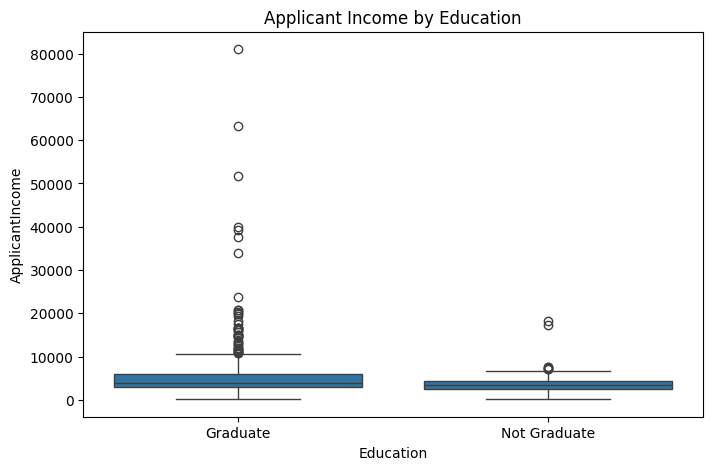

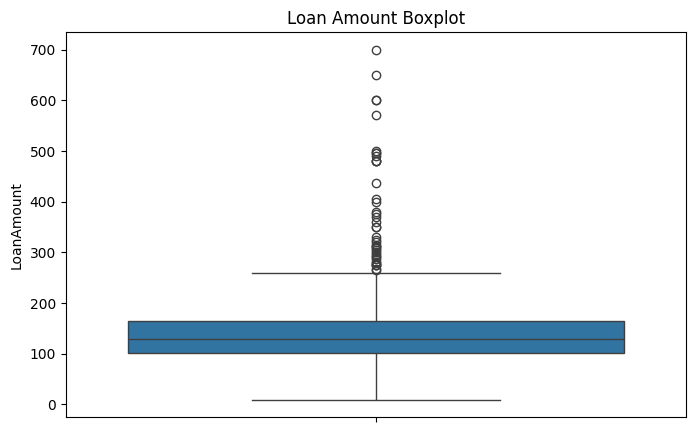

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Education")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y='LoanAmount', data=df)
plt.title("Loan Amount Boxplot")
plt.show()


**Bivariate Analysis — Loan_Status vs  Categorical Features**



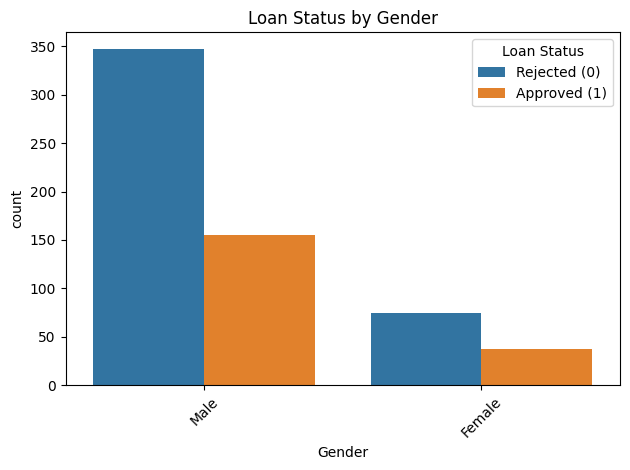

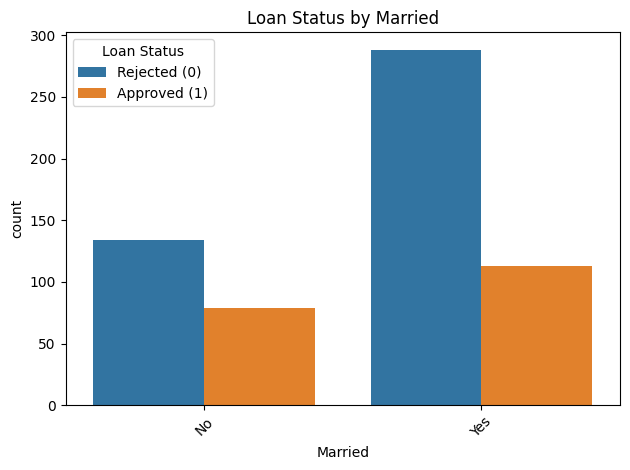

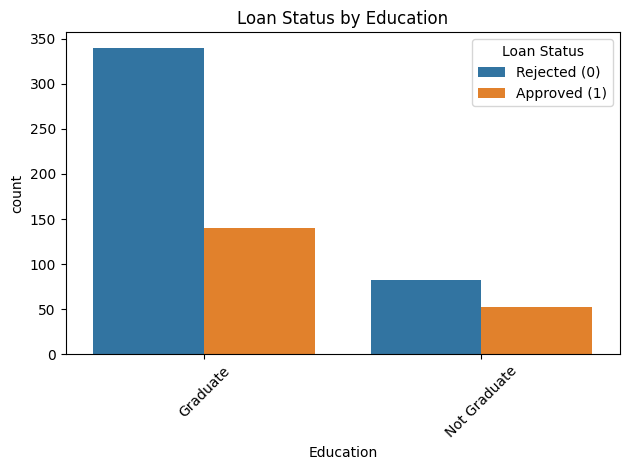

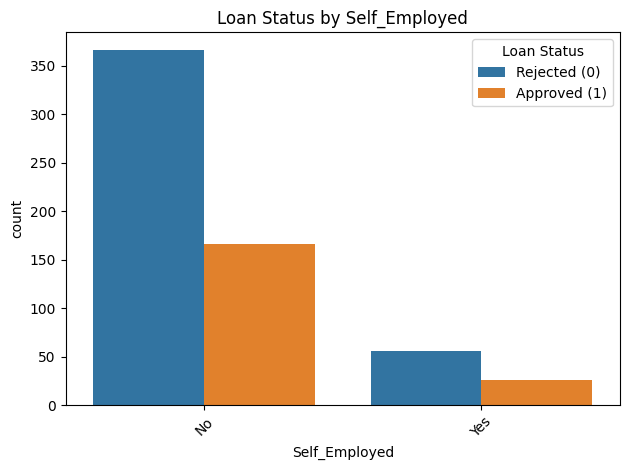

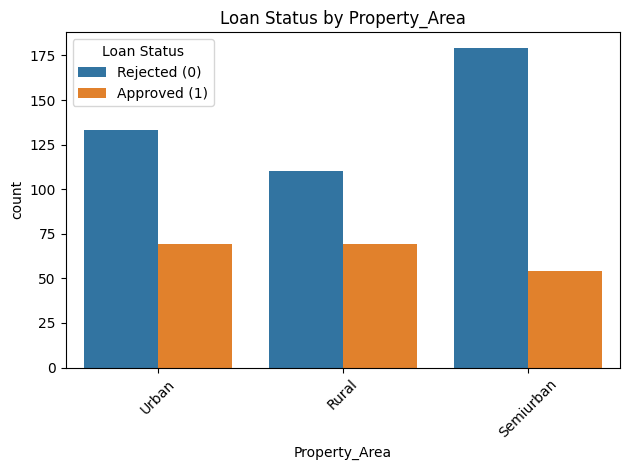

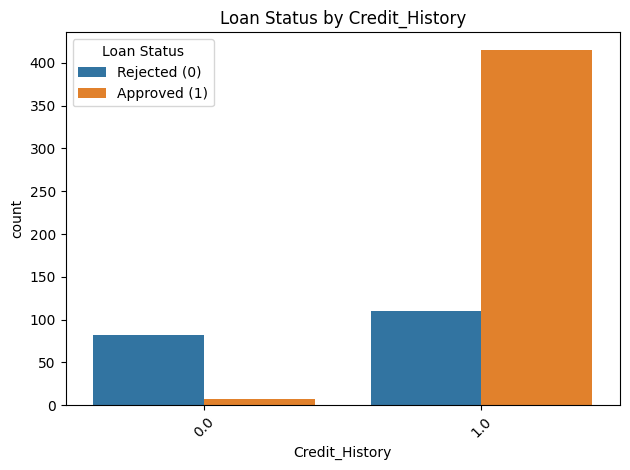

In [ ]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

for col in categorical:
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f"Loan Status by {col}")
    plt.legend(title='Loan Status', labels=['Rejected (0)', 'Approved (1)'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Total Income Feature**

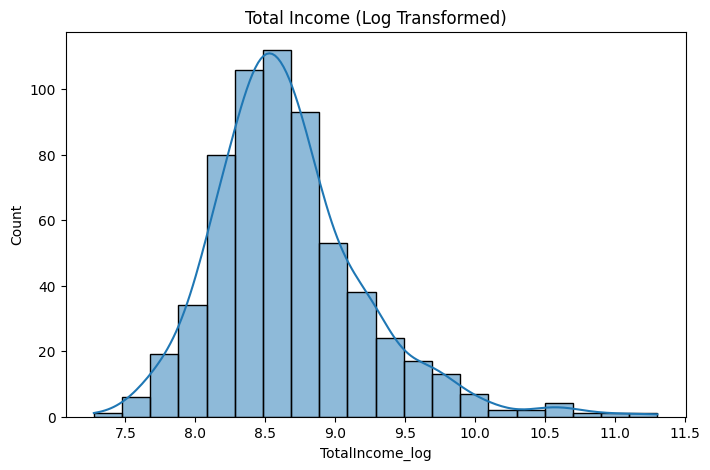

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

plt.figure(figsize=(8,5))
sns.histplot(df['TotalIncome_log'], bins=20, kde=True)
plt.title("Total Income (Log Transformed)")
plt.show()


**Log transformation of LoanAmount**

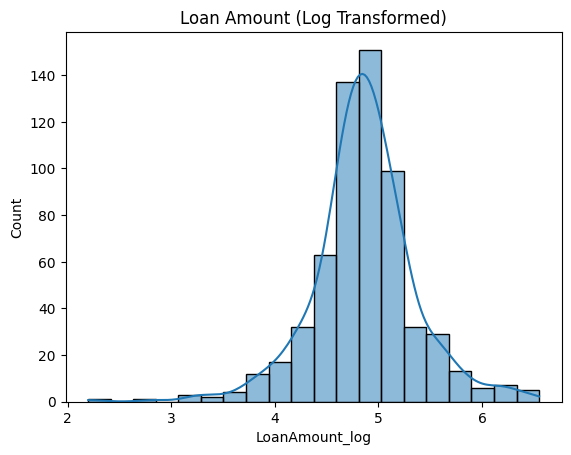

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
sns.histplot(df['LoanAmount_log'], bins=20, kde=True)
plt.title("Loan Amount (Log Transformed)")
plt.show()


**Drop Redundant Features**

In [ ]:
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'LoanAmount'], axis=1, inplace=True)


In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

**Encode Categorical Features**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,LoanAmount_log
0,1,0,0,0,0,360.0,1.0,2,1,8.674026,4.986426
1,1,1,1,0,0,360.0,1.0,0,0,8.714568,4.852030
2,1,1,0,0,1,360.0,1.0,2,1,8.006368,4.189655
3,1,1,0,1,0,360.0,1.0,2,1,8.505323,4.787492
4,1,0,0,0,0,360.0,1.0,2,1,8.699515,4.948760


**Handle Dependents**

In [ ]:
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)


/tmp/ipython-input-24-3829931180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3, inplace=True)


 **Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


**Evaluation**

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy: 0.7886178861788617
Random Forest Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Accuracy: 0.7560975609756098


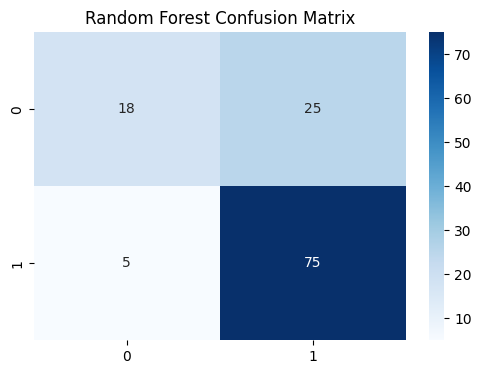

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Results
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest Results
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()
